In [1]:
import pandas as pd
import urllib.request
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import tensorflow as tf


In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",filename='ratings_totals.txt')

df = pd.read_table('ratings_totals.txt',names=['ratings','reviews'])
print(len(df))

94375


In [7]:
tmp = []

for i in df['ratings']:
    if i <=2: tmp.append(0)
    else : tmp.append(1)

In [8]:
df['ratings'] = tmp

In [9]:
df['ratings'].value_counts()

0    47521
1    46854
Name: ratings, dtype: int64

In [10]:
y_data = df['ratings']
x_data = df['reviews']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)


In [11]:
x_train= x_train.to_numpy()
y_train= y_train.to_numpy()
x_test= x_test.to_numpy()
y_test= y_test.to_numpy()



In [12]:
print('train 갯수: ' , len(x_train))
print('test  갯수: ',len(x_test))

train 갯수:  66062
test  갯수:  28313


In [13]:
def clean_str(string):    
    string = re.sub(r"[^가-힝A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

x_train = [clean_str(senetence) for senetence in x_train]
x_train[:5]

['그냥 쓰기는 하는데 뭐가 달라졌는지는 잘 모르겠어여 ',
 '패밀리 사이즈로 샀는데도 4일 \\? 5일 정도만에 다 먹은 것 같아요 ! ! 그런데 외국에서 상품포장할때인지 모르겠지만 받아보니 사진과 같이 오른쪽 부분이 좀 뜯겨있었어요 그래도 안에 내용물은 뜯긴 부분이 없어서 다행이었네요 ',
 '진짜 말라야 입을수있을꺼같네요 골반있음 비추입니다',
 '재구매 그새 부서졌어요 모양은 귀여운데 사실 시소 처럼 햄찌가 타고 놀진 못해요 톱밥에 걸쳐져서 그냥 장식용이에요',
 '세상에 반품제품 보내셨나요 \\? 제대로 스티커를 붙여주시던지 남들이 받아다가 잘못붙인거 보내셨나요 \\? 진짜 반품하려다 아이가 좋아하니 잘 닦아서 쓰네요 사실분들 참고해주세요']

In [14]:
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in x_train]
sentences[:5]

[['그냥', '쓰기는', '하는데', '뭐가', '달라졌는지는', '잘', '모르겠어여', ''],
 ['패밀리',
  '사이즈로',
  '샀는데도',
  '4일',
  '\\?',
  '5일',
  '정도만에',
  '다',
  '먹은',
  '것',
  '같아요',
  '!',
  '!',
  '그런데',
  '외국에서',
  '상품포장할때인지',
  '모르겠지만',
  '받아보니',
  '사진과',
  '같이',
  '오른쪽',
  '부분이',
  '좀',
  '뜯겨있었어요',
  '그래도',
  '안에',
  '내용물은',
  '뜯긴',
  '부분이',
  '없어서',
  '다행이었네요',
  ''],
 ['진짜', '말라야', '입을수있을꺼같네요', '골반있음', '비추입니다'],
 ['재구매',
  '그새',
  '부서졌어요',
  '모양은',
  '귀여운데',
  '사실',
  '시소',
  '처럼',
  '햄찌가',
  '타고',
  '놀진',
  '못해요',
  '톱밥에',
  '걸쳐져서',
  '그냥',
  '장식용이에요'],
 ['세상에',
  '반품제품',
  '보내셨나요',
  '\\?',
  '제대로',
  '스티커를',
  '붙여주시던지',
  '남들이',
  '받아다가',
  '잘못붙인거',
  '보내셨나요',
  '\\?',
  '진짜',
  '반품하려다',
  '아이가',
  '좋아하니',
  '잘',
  '닦아서',
  '쓰네요',
  '사실분들',
  '참고해주세요']]

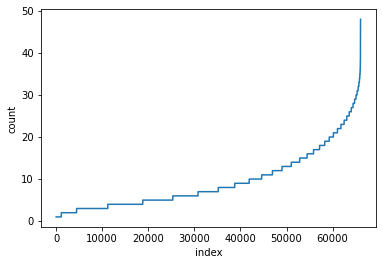

63596


In [15]:


sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.xlabel('index')
plt.ylabel('count')
plt.show()

print(sum([int(l<=25) for l in sentence_len]))


In [16]:
# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new    
sentences[:5]    

[['그냥', '쓰기는', '하는데', '뭐가', '달라졌는지', '잘', '모르겠어여', ''],
 ['패밀리',
  '사이즈로',
  '샀는데도',
  '4일',
  '\\?',
  '5일',
  '정도만에',
  '다',
  '먹은',
  '것',
  '같아요',
  '!',
  '!',
  '그런데',
  '외국에서',
  '상품포장할',
  '모르겠지만',
  '받아보니',
  '사진과',
  '같이',
  '오른쪽',
  '부분이',
  '좀',
  '뜯겨있었어',
  '그래도'],
 ['진짜', '말라야', '입을수있을', '골반있음', '비추입니다'],
 ['재구매',
  '그새',
  '부서졌어요',
  '모양은',
  '귀여운데',
  '사실',
  '시소',
  '처럼',
  '햄찌가',
  '타고',
  '놀진',
  '못해요',
  '톱밥에',
  '걸쳐져서',
  '그냥',
  '장식용이에'],
 ['세상에',
  '반품제품',
  '보내셨나요',
  '\\?',
  '제대로',
  '스티커를',
  '붙여주시던',
  '남들이',
  '받아다가',
  '잘못붙인거',
  '보내셨나요',
  '\\?',
  '진짜',
  '반품하려다',
  '아이가',
  '좋아하니',
  '잘',
  '닦아서',
  '쓰네요',
  '사실분들',
  '참고해주세']]

In [17]:
#  Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000) # 빈도수가 높은 20000개 단어만 사용하여 숫자로 반환하고 나머지는 공백으로 반환
tokenizer.fit_on_texts(sentences)                   # 단어 인덱스를 구축
sequences = tokenizer.texts_to_sequences(sentences) # 문자열을 정수 인덱스의 리스트로 변환, (문장을 정수로 인코딩)
x_train = pad_sequences(sequences,padding='post')   # 문장의 뒤부분으로 0을 패딩한다, 공백도 0으로 채워진다

x_train[:5]  # 25개의 길이로 패딩 완성

array([[    8,  3604,   279,   643,     4, 13475,     1,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [11093,  1389,  4676,  3061,     9,  2132, 17088,    11,  2274,
           33,    15,     2,     2,   256,   350,   891,   425,    75,
         2661,   135,    10, 17089,    55,     0,     0],
       [   24, 17090, 17091,   518,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    6, 17092,  8277,  2563,  4305,   841,   930, 13476,  3605,
         1638,     8,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [ 3606,  8278,     9,   126,  5470,  8278,     9,    24,   963,
          101,  5998,     4,  2448,  1446, 17093, 13477,     0,     0,
            0,     0,     0,     0,     0,     0,     0]],

In [19]:
# Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
print(tokenizer.index_word[106])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가']) # 빈도가 낮은 '잊혀질'은 공백으로 반환
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)  # 최대길이가 1이므로 1보다 작은 문장은 0이 패딩된다

꺼냈는데
보람있네요
깔끔하고
[[], [4920], [], [5600]]
[[   0]
 [4920]
 [   0]
 [5600]]


In [20]:
max_words = 20000    # vocab_size , V
output_dim = 300     # D , hidden_size(Embedding), input_size(LSTM)
max_len = 25         # 문장의 길이 , sequence_length , T

In [21]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words,output_dim,input_length=max_len),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2,activation='softmax')
])

# sparse_categorical_crossentropy : 정답 Y가 희소인 다중 분류 모델의 loss
# categorical_crossentropy: 다중 분류 모델의 loss

# loss 종류
# mean_squared_error : 평균제곱 오차
# binary_crossentropy : 이진분류 오차
# categorical_crossentropy : 다중 분류 오차. one-hot encoding 클래스, [0.2, 0.3, 0.5] 와 같은 출력값과 실측값의 오차값을 계산한다.
# sparse_categorical_crossentropy: 다중 분류 오차. 위와 동일하지만 , integer type 클래스라는 것이 다르다
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 학습 : 약 15분 소요
history = model.fit(x_train,y_train, epochs=3, batch_size=128, validation_split=0.2)

Train on 52849 samples, validate on 13213 samples
Epoch 1/3
52849/52849 [==============================] - 62s 1ms/sample - loss: 0.3699 - accuracy: 0.8289 - val_loss: 0.2967 - val_accuracy: 0.8775
Epoch 2/3
52849/52849 [==============================] - 59s 1ms/sample - loss: 0.2315 - accuracy: 0.9081 - val_loss: 0.3027 - val_accuracy: 0.8742
Epoch 3/3
52849/52849 [==============================] - 58s 1ms/sample - loss: 0.1863 - accuracy: 0.9248 - val_loss: 0.3878 - val_accuracy: 0.8691


In [23]:
print(history.history['loss'])
print(history.history['val_loss'])
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.36993712400480594, 0.23150709473481568, 0.18632419141989498]
[0.29666983838347694, 0.30269019904549327, 0.387771289474506]
[0.82887095, 0.9080777, 0.9247668]
[0.8775448, 0.87421477, 0.8690683]


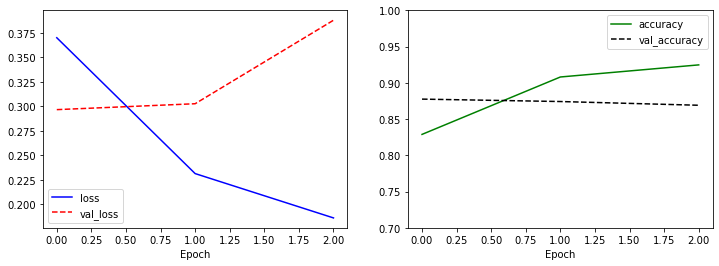

In [24]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [27]:
# 정확도 측정
# X 값을 추출
# test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]

x_test =[clean_str(sentence) for sentence in x_test ]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in x_test]

# 단어 정제 및 문장 길이 줄임 : 각 단어의 최대 길이를 5로 고정
# 문장의 최대 길이를 25로 잡고 그 이상은 잘라내고 단어의 앞에서 5글자씩만 잘라서 사용한다
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence[:25]])
sentences = sentences_new

sequences = tokenizer.texts_to_sequences(sentences)  # 정수 인덱스로 인코딩하여 리스트로 반환
x_test = pad_sequences(sequences,padding='post')     # 문장의 뒤부분으로 0을 패딩한다, 공백도 0으로 채워진다

x_test[:5]  # 25개의 길이로 패딩 완성

array([[    6,  2092, 11548,  2092,   322,   171,  1236,  2712,   222,
         4456,  6081, 14175,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  189,  7860,    33,  2298,   205,  8280,  2376, 15734,   213,
          133,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [    6,  1239,  1215,   418,  4849,  2944,   618,  3520, 15143,
          290, 15248,   180, 14187,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  186,    22,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  552,  7619,   243,   184,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]],

In [28]:
accr = model.evaluate(x_test,y_test)

28313/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1])) # Accuracy: 0.801

Test set
  Loss: 0.392
  Accuracy: 0.868


In [30]:
# 임의의 문장 감성 분석 예측 결과 확인
test_sentence = '배송 빠르게 잘 받았습니다.저렴하게 필요한 제품 잘 구매한것 같네요.'
test_sentence = test_sentence.split(' ') # ['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
# test_sentences  # 9개

sequences = tokenizer.texts_to_sequences(test_sentences) 
test_X_1 = pad_sequences(sequences,padding='post',maxlen=25) 
# test_X_1

prediction = model.predict(test_X_1)  # 분류할 값 2개가 확률로 출력

for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['배송']
[0.7758619  0.22413807]
['배송', '빠르게']
[0.21593446 0.78406554]
['배송', '빠르게', '잘']
[0.11730219 0.8826978 ]
['배송', '빠르게', '잘', '받았습니다.저렴하게']
[0.11730219 0.8826978 ]
['배송', '빠르게', '잘', '받았습니다.저렴하게', '필요한']
[0.03610987 0.9638902 ]
['배송', '빠르게', '잘', '받았습니다.저렴하게', '필요한', '제품']
[0.04414558 0.9558544 ]
['배송', '빠르게', '잘', '받았습니다.저렴하게', '필요한', '제품', '잘']
[0.03940978 0.96059024]
['배송', '빠르게', '잘', '받았습니다.저렴하게', '필요한', '제품', '잘', '구매한것']
[0.03940978 0.96059024]
['배송', '빠르게', '잘', '받았습니다.저렴하게', '필요한', '제품', '잘', '구매한것', '같네요.']
[0.03940979 0.96059024]


In [32]:
# 감성 분석 함수 구현
def sentiment_predict(test_sentence):
    test_sentence = test_sentence.split(' ')
    test_sentences = []
    now_sentence = []

    for word in test_sentence:
        now_sentence.append(word)
        test_sentences.append(now_sentence[:])

    sequences = tokenizer.texts_to_sequences(test_sentences) 
    test_X_1 = pad_sequences(sequences,padding='post',maxlen=25) 

    prediction = model.predict(test_X_1)  

    for idx, sentence in enumerate(test_sentences):
        score = prediction[idx]
    
    if(score[0] > score[1]):
        print("{:.2f}% 확률로 부정 리뷰입니다.".format(score[0] * 100))
    else:
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format((1 - score[0]) * 100))  

In [33]:
sentiment_predict('배송 빠르게 잘 받았습니다.저렴하게 필요한 제품 잘 구매한것 같네요.')

96.06% 확률로 긍정 리뷰입니다.
